## **Tuberculosis Classification using Deep Learning: AI-Powered Early Detection System**

---

### **📋 Overview Proyek**

Notebook ini mengembangkan sistem klasifikasi otomatis untuk deteksi dini Tuberkulosis (TBC) menggunakan teknologi Deep Learning dan citra X-ray dada. Proyek ini merupakan bagian dari solusi inovatif **"Akselerasi Diagnosis TBC: Implementasi Kecerdasan Artifisial Berbasis Citra Medis pada Ekosistem SatuSehat"** yang dikembangkan oleh **Tim HaloRek** untuk **Statistic Infographic Competition**.

### **👥 Tim Pengembang**
- **Dwi Anggara Najwan Sugama**
- **Mohammad Dwi Affriza**
- **Nino Auliya Nahara**

---

### **🎯 Objektif Utama**

1. **Mengembangkan model AI** yang mampu mengklasifikasikan citra X-ray dada menjadi Normal atau TBC dengan akurasi tinggi
2. **Mengeksplorasi berbagai arsitektur pre-trained model** untuk menemukan performa optimal
3. **Menerapkan teknik transfer learning** yang efektif untuk domain medis
4. **Menyediakan foundation teknologi** untuk integrasi ke dalam ekosistem SatuSehat

---

### **📊 Dataset Information**

**Tuberculosis (TB) Chest X-ray Database**
- **Sumber**: Qatar University, University of Dhaka, Malaysia, dan Hamad Medical Corporation
- **Komposisi**:
  - 700 citra TBC (publik) + 2800 citra TBC (NIAID TB portal)
  - 3500 citra Normal
- **Total**: 4200 citra X-ray dada berkualitas tinggi
- **Publikasi**: IEEE Access (2020) dengan akurasi penelitian mencapai 98.3%

**Credit Reference**:
*Tawsifur Rahman, et al. (2020) "Reliable Tuberculosis Detection using Chest X-ray with Deep Learning, Segmentation and Visualization". IEEE Access, Vol. 8, pp 191586 - 191601.*

---


### **📚 Referensi Teknis**

**Base Reference**: Sanphat Sangudsup's Tuberculosis Classification Notebook
- Sample weighting methodology
- Data preprocessing pipeline
- Model evaluation framework

**Key Improvements**:
- ✅ Multi-architecture exploration (EfficientNet, DenseNet, ResNet)
- ✅ Optimized preprocessing for each model type
---

### **🔬 Metodologi & Inovasi**

#### **1. Data Preprocessing Pipeline**
- **Normalisasi Adaptif**: Implementasi berbagai metode preprocessing sesuai karakteristik masing-masing model
- **Data Augmentation**: Rotasi, zoom, dan shift untuk meningkatkan robustness model
- **Stratified Split**: Pembagian data train (80%), validation (10%), test (10%) dengan distribusi seimbang

#### **2. Advanced Transfer Learning Strategy**
**Eksplorasi Multi-Architecture Approach:**

**🎯 EfficientNet (B0-B4)**
- Compound scaling method untuk efisiensi optimal
- Preprocessing: Range scaling [0,1] → [-1,1]
- Target: Keseimbangan performa-efisiensi terbaik

**🔗 DenseNet121**  
- Dense connectivity untuk feature reuse maksimal
- Preprocessing: Samplewise normalization
- Target: Deteksi anomali halus pada X-ray

**🛡️ ResNet50**
- Residual connections untuk stabilitas training
- Preprocessing: ImageNet mean subtraction
- Target: Baseline andal dan proven architecture

#### **3. Class Imbalance Handling**
**Weighted Loss Function Implementation:**

$$\mathcal{L}_{cross-entropy}^{w}(x) = - (w_{p} y \log(f(x)) + w_{n}(1-y) \log( 1 - f(x) ) ).$$

- **Automatic weight calculation** berdasarkan distribusi kelas
- **Balanced contribution** antara kelas positif dan negatif
- **Optimized for medical data** dengan prevalensi tidak seimbang

---

### **🔍 Struktur Notebook**

1. **Data Acquisition & EDA** - Dataset loading dan analisis eksploratori
2. **Preprocessing Pipeline** - Multi-model data preparation
3. **Model Architecture Design** - Implementation tiga arsitektur utama
4. **Training & Optimization** - Transfer learning dengan weighted loss
5. **Performance Evaluation** - Comprehensive model assessment
6. **Model Comparison** - Analisis komparatif performa

---

*Notebook ini dikembangkan sebagai fondasi teknologi untuk revolusi deteksi dini TBC di Indonesia melalui implementasi AI pada ekosistem kesehatan digital SatuSehat.*

# Download Dataset from Kaggle

In [ ]:
import os
import shutil

# Direktori yang ingin dibersihkan
folder_path = "/content"

# Hapus semua file dan folder di dalam folder_path
for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    try:
        if os.path.isfile(file_path) or os.path.islink(file_path):
            os.unlink(file_path)  # Hapus file atau symlink
        elif os.path.isdir(file_path):
            shutil.rmtree(file_path)  # Hapus folder
        print(f"Deleted: {file_path}")
    except Exception as e:
        print(f"Failed to delete {file_path}. Reason: {e}")


Deleted: /content/.config
Deleted: /content/sample_data


In [ ]:
import kagglehub
tawsifurrahman_tuberculosis_tb_chest_xray_dataset_path = kagglehub.dataset_download('tawsifurrahman/tuberculosis-tb-chest-xray-dataset')

print('Data source import complete.')


100%|██████████| 663M/663M [00:22<00:00, 31.0MB/s]

Extracting files...


Data source import complete.


# **Tuberculosis Classification using DenseNet121**
---
### **Overview of Tuberculosis (TB)**

**According to [World Health Organization (WHO)](https://www.who.int/health-topics/tuberculosis#tab=tab_1)**
* Tuberculosis is caused by bacteria (Mycobacterium tuberculosis) and it most often affects the lungs. TB is spread through the air when people with lung TB cough, sneeze or spit. A person needs to inhale only a few germs to become infected.
* If we look at chest X-ray of a person with advanced tuberculosis, we will see **infection in lungs** and **the formation of a cavity**.

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTWfVD5iIMNyJdAYNMayyhK6q3WbfBxynoH_w&usqp=CAU)



Image reference : [radlines.org](https://radlines.org/X-ray_of_the_thorax_in_tuberculosis)


---
<a id='1'></a>
# **EDA and splitting data**

In [ ]:
#import libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import shutil

from tensorflow.keras.preprocessing.image import ImageDataGenerator , load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.layers import GlobalAveragePooling2D , Dense
from keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras import backend as K
from keras.preprocessing import image
from sklearn.metrics import roc_auc_score, roc_curve
from tensorflow.compat.v1.logging import INFO, set_verbosity


from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, roc_auc_score

import glob
import random
import re

import random
from IPython.display import Image
import matplotlib.cm as cm


%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
tf.__version__

'2.18.0'

In [ ]:
# create helper function
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

# Import series of helper functions for our notebook
from helper_functions import plot_loss_curves, walk_through_dir, make_confusion_matrix


--2025-07-14 09:06:14--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0.001s  

2025-07-14 09:06:14 (7.08 MB/s) - ‘helper_functions.py’ saved [10246/10246]



<a id='1-1'></a>
### **Load images and metadata**

In [ ]:
# load metadata
df_norm = pd.read_excel(tawsifurrahman_tuberculosis_tb_chest_xray_dataset_path + '/TB_Chest_Radiography_Database/Normal.metadata.xlsx')
df_tb = pd.read_excel(tawsifurrahman_tuberculosis_tb_chest_xray_dataset_path + '/TB_Chest_Radiography_Database/Tuberculosis.metadata.xlsx')

In [ ]:
# Example of metadata
print('Normal metadata')
print(df_norm.head(2))
print(df_norm.shape[0])
print('_____________________________')
print('TB metadata')
print(df_tb.head(2))
print(df_tb.shape[0])

Normal metadata
  FILE NAME FORMAT     SIZE                                                URL
0  Normal-1    PNG  512*512  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4...
1  Normal-2    PNG  512*512  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4...
3500
_____________________________
TB metadata
        FILE NAME FORMAT     SIZE                      URL
0  Tuberculosis-1    PNG  512*512  http://tuberculosis.by/
1  Tuberculosis-2    PNG  512*512  http://tuberculosis.by/
700


In [ ]:
# Join both normal and tuberculosis excels
# create Label feature ['Tuberculosis']
df_norm['Tuberculosis'] = float(0)
df_tb['Tuberculosis'] = float(1)
df_norm.drop(columns = ['FORMAT', 'SIZE', 'URL'], inplace = True)
df_tb.drop(columns = ['FORMAT', 'SIZE', 'URL'], inplace = True)
df = pd.concat([df_norm, df_tb])
df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
# Rename column
df.rename(columns = {'FILE NAME':'Image'}, inplace = True)
label = ['Tuberculosis']

In [ ]:
# Walk through directory
ds = tawsifurrahman_tuberculosis_tb_chest_xray_dataset_path + "/TB_Chest_Radiography_Database"
walk_through_dir(ds)

SOURCE_PATH_NORM = os.path.join(ds, 'Normal')
SOURCE_PATH_TB = os.path.join(ds, 'Tuberculosis')


# os.listdir returns a list containing all files under the given path
print(f"There are {len(os.listdir(SOURCE_PATH_NORM))} images of Normal.")
print(f"There are {len(os.listdir(SOURCE_PATH_TB))} images of Tuberculosis.")

There are 2 directories and 3 images in '/root/.cache/kagglehub/datasets/tawsifurrahman/tuberculosis-tb-chest-xray-dataset/versions/3/TB_Chest_Radiography_Database'.
There are 0 directories and 700 images in '/root/.cache/kagglehub/datasets/tawsifurrahman/tuberculosis-tb-chest-xray-dataset/versions/3/TB_Chest_Radiography_Database/Tuberculosis'.
There are 0 directories and 3500 images in '/root/.cache/kagglehub/datasets/tawsifurrahman/tuberculosis-tb-chest-xray-dataset/versions/3/TB_Chest_Radiography_Database/Normal'.
There are 3500 images of Normal.
There are 700 images of Tuberculosis.


In [ ]:
# create whole images, train ,validation and test directories in output folder
def create_img_train_val_test_dirs(root_path):
  train_dir = os.path.join(root_path,'training')
  val_dir = os.path.join(root_path, 'validation')
  test_dir = os.path.join(root_path,'testing')
  os.makedirs(train_dir + '/Normal')
  os.makedirs(train_dir + '/Tuberculosis')
  os.makedirs(val_dir + '/Normal')
  os.makedirs(val_dir + '/Tuberculosis')
  os.makedirs(test_dir + '/Normal')
  os.makedirs(test_dir + '/Tuberculosis')
  os.makedirs(root_path + '/Images')

create_img_train_val_test_dirs('./')

In [ ]:
# Map train validation test directories

IMAGE_DIR = os.path.join('./', 'Images')

TRAINING_DIR = "./training"
VAL_DIR = "./validation"
TESTING_DIR = "./testing"

TRAINING_NORM_DIR = os.path.join(TRAINING_DIR, "Normal/")
VAL_NORM_DIR = os.path.join(VAL_DIR, "Normal/")
TESTING_NORM_DIR = os.path.join(TESTING_DIR, "Normal/")

TRAINING_TB_DIR = os.path.join(TRAINING_DIR, "Tuberculosis/")
VAL_TB_DIR = os.path.join(VAL_DIR, "Tuberculosis/")
TESTING_TB_DIR = os.path.join(TESTING_DIR, "Tuberculosis/")

<a id='1-2'></a>
### **Split data for train val and test dataset**
#### Partition as {train : 80, Val : 10, Test : 10}
#### Equally split for both Normal and Tuberculosis

In [ ]:
def split_data(SOURCE, TRAINING, VAL, TESTING, SPLIT_SIZE_TRAIN = 0.8, SPLIT_SIZE_VAL = 0.1):

  zero_dir = [fn for fn in os.listdir(SOURCE) if os.path.getsize(os.path.join(SOURCE, fn)) == 0]
  for fn in zero_dir :
    print(fn,'is zero length, so ignoring.')

  use_dir = [fn for fn in os.listdir(SOURCE) if fn not in zero_dir]
  random.seed(2)
  train_dt = random.sample(use_dir, np.int64(SPLIT_SIZE_TRAIN * len(use_dir)))
  test_dt = [fn for fn in use_dir if fn not in train_dt]
  val_dt = random.sample(test_dt, np.int64(SPLIT_SIZE_VAL * len(use_dir)))
  test_dt = [fn for fn in test_dt if fn not in val_dt]
  for fn in train_dt :
    shutil.copy(os.path.join(SOURCE, fn), TRAINING)
  for fn in val_dt :
    shutil.copy(os.path.join(SOURCE, fn), VAL)
  for fn in test_dt:
    shutil.copy(os.path.join(SOURCE, fn), TESTING)


split_data(SOURCE_PATH_NORM, TRAINING_NORM_DIR, VAL_NORM_DIR,  TESTING_NORM_DIR)
split_data(SOURCE_PATH_TB, TRAINING_TB_DIR, VAL_TB_DIR,  TESTING_TB_DIR)

In [ ]:
def images_copy(SOURCE_N, SOURCE_TB, IMAGE_DIR ):

    zero_dir = [fn for fn in os.listdir(SOURCE_N) if os.path.getsize(os.path.join(SOURCE_N, fn)) == 0]
    zero_dir.append([fn for fn in os.listdir(SOURCE_TB) if os.path.getsize(os.path.join(SOURCE_TB, fn)) == 0])

    for fn in zero_dir :
        print(fn,'is zero length, so ignoring.')

    use_dir_n = [fn for fn in os.listdir(SOURCE_N) if fn not in zero_dir]
    use_dir_tb = [fn for fn in os.listdir(SOURCE_TB) if fn not in zero_dir]
    random.seed(2)

    for fn in use_dir_n :
        shutil.copy(os.path.join(SOURCE_N, fn), IMAGE_DIR)
    for fn in use_dir_tb :
        shutil.copy(os.path.join(SOURCE_TB, fn), IMAGE_DIR)

images_copy(SOURCE_PATH_NORM, SOURCE_PATH_TB, IMAGE_DIR )

[] is zero length, so ignoring.


In [ ]:
len(os.listdir(IMAGE_DIR))

4200

In [ ]:
# create df_train, df_val, df_test
def create_df(NORM_DIR, TB_DIR , df ):
    df_fn_n = os.listdir(NORM_DIR)
    df_fn_tb = os.listdir(TB_DIR)
    df_fn = df_fn_n + df_fn_tb
    df_ext = []
    for fn in df_fn:
        df_ext.append(fn[:-4])
    df_res = df[df['Image'].isin(df_ext)]

    return df_res

In [ ]:
train_df = create_df(TRAINING_NORM_DIR, TRAINING_TB_DIR ,df )
val_df = create_df(VAL_NORM_DIR, VAL_TB_DIR, df)
test_df = create_df(TESTING_NORM_DIR, TESTING_TB_DIR, df)

In [ ]:
# add .png as suffix in Filename column since our images name has .png as suffix also
train_df['Image'] = train_df['Image'] + '.png'
val_df['Image'] = val_df['Image'] + '.png'
test_df['Image'] = test_df['Image'] + '.png'

In [ ]:
# If we create dfs correctly, the sum of rows ahould be 4200
print(train_df.shape[0] + val_df.shape[0] + test_df.shape[0])

4200


<a id='1-3'></a>
### **Display sample images from training dataset**

In [ ]:
import glob
train_norm = glob.glob(TRAINING_NORM_DIR +'/*.png')
train_tb = glob.glob(TRAINING_TB_DIR + '/*.png')

In [ ]:
train_norm[:5]

['./training/Normal/Normal-508.png',
 './training/Normal/Normal-3026.png',
 './training/Normal/Normal-2823.png',
 './training/Normal/Normal-161.png',
 './training/Normal/Normal-1243.png']

<a id='1-3-1'></a>
### **Normal X-ray images**

Normal


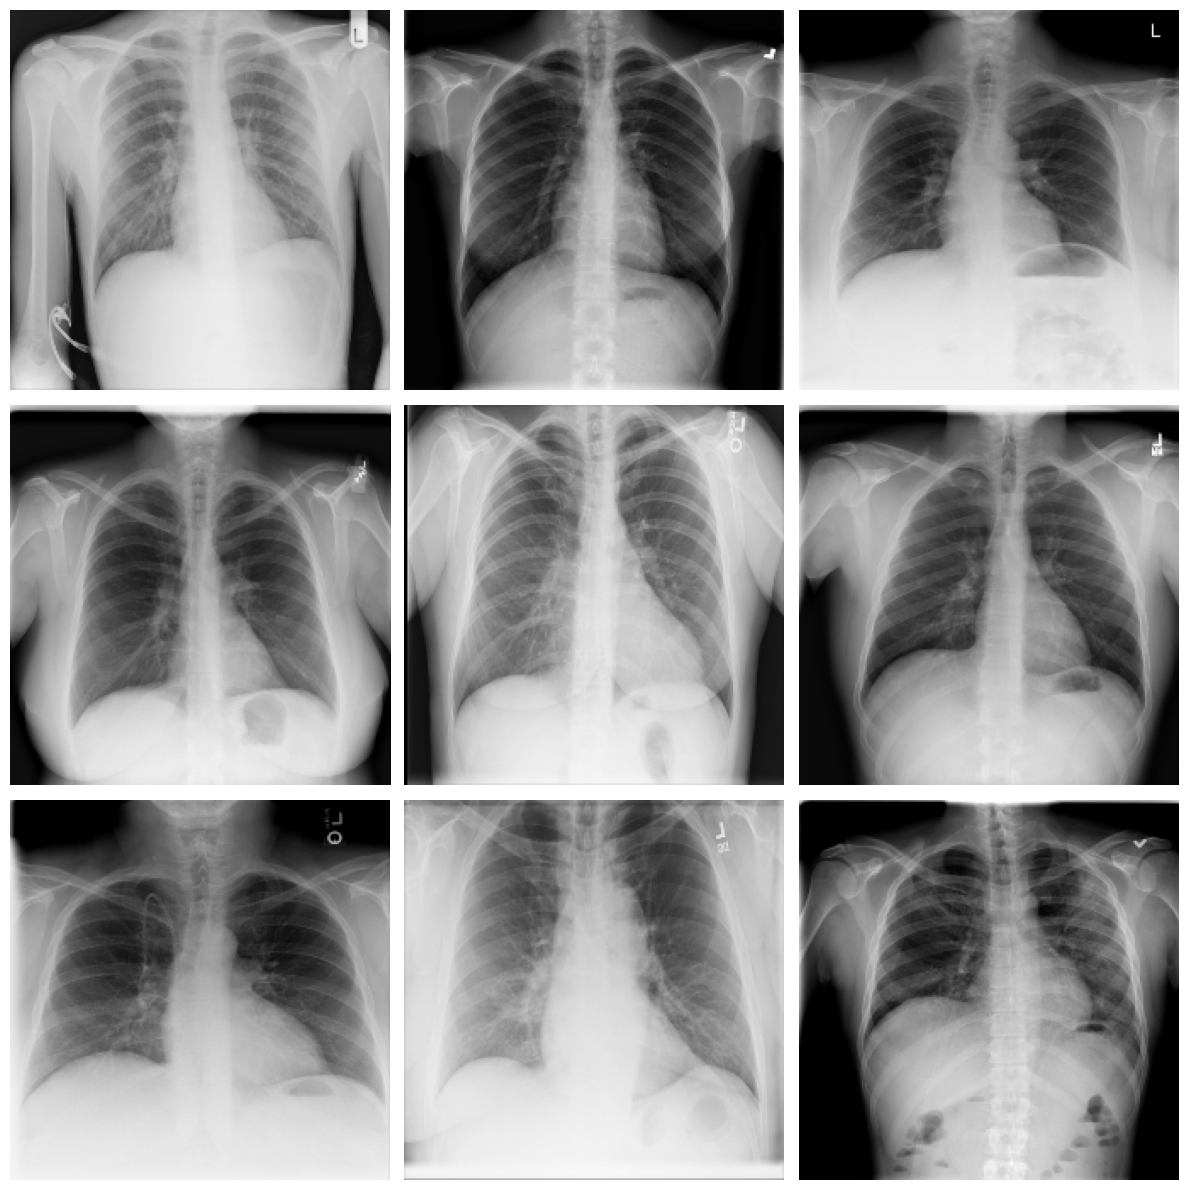

In [ ]:
print('Normal')

plt.figure(figsize=(12,12))

for i in range(0, 9):
    plt.subplot(3,3,i + 1)
    img = cv2.imread(train_norm[i])
    img = cv2.resize(img, (224,224))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()
plt.show()

<a id='1-3-2'></a>
### **Tuberculosis X-ray images**

Tuberculosis


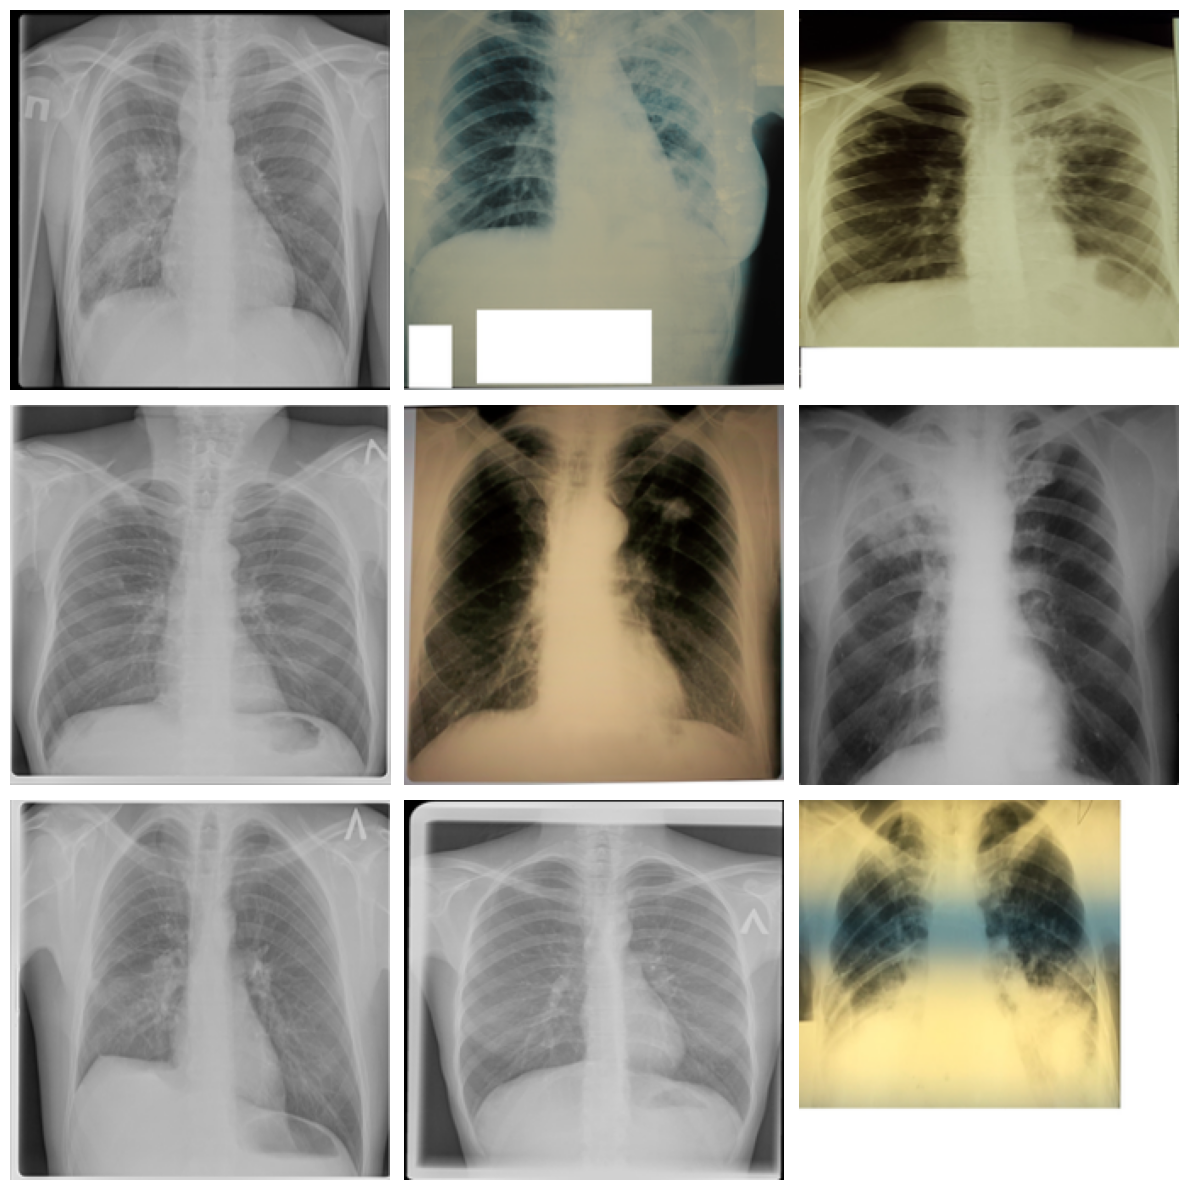

In [ ]:
print('Tuberculosis')

plt.figure(figsize=(12,12))

for i in range(0, 9):
    plt.subplot(3,3,i + 1)
    img = cv2.imread(train_tb[i])
    img = cv2.resize(img, (224,224))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()
plt.show()

# **Transfer learning with DenseNet121**

<a id='2'></a>
## **Preprocessing data**

<a id='2-1'></a>
### **Build a train generator**
**few things to note:**
1. We **normalize** the mean and standard deviation of **each data**
2. We **shuffle** the input after each epoch.
3. We set the image size to be **320px by 320px**
4. We apply some **augmentations (Rotation, Zoom, Width shift and Height shift)** based on possition deviation which could possibly be slightly changed when radiographers x-ray patients
5. The generator converts single channel X-ray images (gray-scale) to a three-channel format by repeating the values in the image across all channels. (The pre-trained model requires three-channel inputs)

In [ ]:
def get_train_generator(df, image_dir, x_col, y_col, shuffle=True, batch_size=8, seed=1, target_w = 320, target_h = 320):
    # x_col (str): name of column in df that holds filenames.
    # y_col (list): name of column in df that holds labels.

    print("getting train generator...")
    # normalize each image using batch statistic
    image_generator = ImageDataGenerator(
        samplewise_center=True,
        samplewise_std_normalization= True,
        zoom_range = 0.1,
        rotation_range = 5,
        width_shift_range = 0.1,
        height_shift_range = 0.1)

    # flow from directory with specified batch size
    # and target image size
    train_generator = image_generator.flow_from_dataframe( dataframe=df,
                                                           directory=image_dir,
                                                           x_col=x_col,
                                                           y_col=y_col,
                                                           class_mode="raw",
                                                           batch_size=batch_size,
                                                           shuffle=shuffle,
                                                           seed=seed,
                                                           target_size=(target_w,target_h))



    return train_generator

<a id='2-2'></a>
### **Build validation and test generators**
**few things to note:**
1. We normalize validation data and incoming test data using the **statistics computed from the training set**
2. For reduce time consuming, we'll take a random sample of the dataset and calculate the sample mean and sample standard deviation. (Ideally, we should compute our sample mean and standard deviation using the entire training set)

In [ ]:
def get_test_and_valid_generator(val_df, test_df, train_df, image_dir, x_col, y_col, sample_size=100, batch_size=8, seed=1, target_w = 320, target_h = 320):

    print("getting val and test generators...")
    # get generator to sample dataset
    raw_train_generator = ImageDataGenerator().flow_from_dataframe( dataframe=train_df,
                                                           directory=image_dir,
                                                           x_col= 'Image',
                                                           y_col= 'Tuberculosis',
                                                           class_mode="raw",
                                                           batch_size=sample_size,
                                                           shuffle=True,
                                                           seed=seed,
                                                           target_size=(target_w,target_h))

    # get data sample
    batch = next(raw_train_generator)
    data_sample = batch[0]

    # use sample to fit mean and std for test set generator
    image_generator = ImageDataGenerator(
        featurewise_center=True,
        featurewise_std_normalization= True)

    # fit generator to sample from training data
    # This computes the internal data stats related to the data-dependent transformations, based on an array of sample data.
    image_generator.fit(data_sample)
    # if we want to calculate the mean and std on the entire training dataset
    # image_generator.fit(raw_train_generator)

    # get val and test generator
    val_generator = image_generator.flow_from_dataframe(
            dataframe=val_df,
            directory=image_dir,
            x_col=x_col,
            y_col=y_col,
            class_mode="raw",
            batch_size=batch_size,
            shuffle=False,
            seed=seed,
            target_size=(target_w,target_h))

    test_generator = image_generator.flow_from_dataframe(
            dataframe=test_df,
            directory=image_dir,
            x_col=x_col,
            y_col=y_col,
            class_mode="raw",
            batch_size=batch_size,
            shuffle=False,
            seed=seed,
            target_size=(target_w,target_h))

    return val_generator, test_generator

In [ ]:
train_generator = get_train_generator(train_df, IMAGE_DIR, 'Image', 'Tuberculosis')
val_generator, test_generator= get_test_and_valid_generator(val_df, test_df, train_df, IMAGE_DIR, 'Image', 'Tuberculosis')

getting train generator...
Found 3360 validated image filenames.
getting val and test generators...
Found 3360 validated image filenames.
Found 420 validated image filenames.
Found 420 validated image filenames.


<a id='2-3'></a>
### **Display a normalized image in train generator**

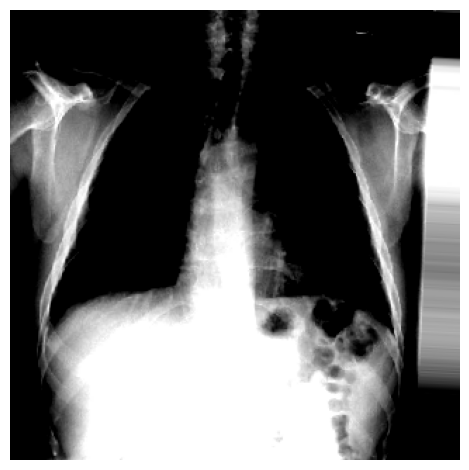

Image shape (320, 320, 3)


In [ ]:
x, y = train_generator.__getitem__(0)
plt.imshow(x[0])
plt.axis("off")
plt.tight_layout()
plt.show()
print('Image shape',x[0].shape)

<a id='3'></a>
## **Handling class imbalance**
Fixed by Sample Weighting in Loss Function (weighting the contributions of positive and negative losses to be equal)
More information cae be read [here](https://www.kaggle.com/code/sanphats/microcalcification-weighting-loss-dnn)



In [ ]:
train_tb = len(os.listdir(TRAINING_TB_DIR))
train_norm = len(os.listdir(TRAINING_NORM_DIR))
print('Percent of Tuberculosis/Normal : {} %'.format(100 * train_tb/train_norm))

Percent of Tuberculosis/Normal : 20.0 %


In [ ]:
#create positive frequency and negative frequency
freq_pos = round((train_tb/train_norm),2)
freq_neg = 1 - freq_pos

create positive/negative contributors
$$w_{pos} \times freq_{p} = w_{neg} \times freq_{n},$$
$$w_{pos} = freq_{neg}$$
$$w_{neg} = freq_{pos}$$

In [ ]:
pos_weights = freq_neg
neg_weights = freq_pos
pos_contribution = freq_pos * pos_weights
neg_contribution = freq_neg * neg_weights

Final weight loss
$$\mathcal{L}_{cross-entropy}^{w}(x) = - (w_{p} y \log(f(x)) + w_{n}(1-y) \log( 1 - f(x) ) ).$$

In [ ]:
# create weight loss
def get_weighted_loss(pos_weights, neg_weights, epsilon=1e-7):

    def weighted_loss(y_true, y_pred):
        # initialize loss to zero
        loss = 0.0

        # for each class, add average weighted loss for that class
        loss += K.mean(-(pos_weights *y_true * K.log(y_pred + epsilon)
                             + neg_weights* (1 - y_true) * K.log( 1 - y_pred + epsilon)))
        return loss

    return weighted_loss

<a id='4'></a>
## Modeling

In [ ]:
## create the base pre-trained model
base_model = DenseNet121(weights='imagenet', include_top=False, classes=2, input_shape=(320, 320, 3))

x = base_model.output

# add a global spatial average pooling layer
x = GlobalAveragePooling2D()(x)

# and a logistic layer
output = Dense(1, activation="sigmoid")(x)

model = Model(inputs=base_model.input, outputs = output)
model.compile(optimizer= 'adam', loss=get_weighted_loss(pos_weights, neg_weights), metrics=["accuracy","AUC"])
# model.compile(optimizer= 'adam', loss="binary_crossentropy", metrics=["accuracy","AUC"])

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
# callbacks

checkpoint_path = "./training_1/cp.weights.h5"
checkpoint_dir = os.path.dirname(checkpoint_path)

MC = ModelCheckpoint(filepath= checkpoint_path, verbose =2, save_weights_only=True )
# RLR = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 3, verbose = 2, min_lr =0.001)
# ES = EarlyStopping(monitor = 'val_loss', patience = 4, verbose = 2)

In [ ]:
# fit model
history = model.fit(train_generator,
                              validation_data=val_generator,
                              steps_per_epoch=100,
                              validation_steps= 30,
                              epochs = 3,
                              callbacks = [MC])

Epoch 1/3
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - AUC: 0.8901 - accuracy: 0.8364 - loss: 0.1320 
Epoch 1: saving model to ./training_1/cp.weights.h5
100/100 ━━━━━━━━━━━━━━━━━━━━ 1357s 13s/step - AUC: 0.8903 - accuracy: 0.8367 - loss: 0.1318 - val_AUC: 0.5429 - val_accuracy: 0.8167 - val_loss: 2.1173
Epoch 2/3
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - AUC: 0.9327 - accuracy: 0.9077 - loss: 0.0828 
Epoch 2: saving model to ./training_1/cp.weights.h5
100/100 ━━━━━━━━━━━━━━━━━━━━ 1281s 13s/step - AUC: 0.9329 - accuracy: 0.9077 - loss: 0.0827 - val_AUC: 0.6434 - val_accuracy: 0.3417 - val_loss: 1.5565
Epoch 3/3
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - AUC: 0.9373 - accuracy: 0.8978 - loss: 0.0740 
Epoch 3: saving model to ./training_1/cp.weights.h5
100/100 ━━━━━━━━━━━━━━━━━━━━ 1283s 13s/step - AUC: 0.9375 - accuracy: 0.8979 - loss: 0.0740 - val_AUC: 0.5116 - val_accuracy: 0.8208 - val_loss: 2.2640


In [ ]:
# load weights
model = Model(inputs=base_model.input, outputs = output)
model.load_weights(checkpoint_path)

<a id='4-1'></a>
### **Model summary**

In [ ]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 320, 320,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_4    │ (None, 326, 326,  │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 160, 160,  │      9,408 │ zero_padding2d_4… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 160, 160,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 160, 160,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_5    │ (None, 162, 162,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 80, 80,    │          0 │ zero_padding2d_5… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 80, 80,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 80, 80,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 80, 80,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 80, 80,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 80, 80,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 80, 80,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 80, 80,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 80, 80,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 80, 80,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 80, 80,    │     12,288 │ conv2_block2_0_r

 Total params: 7,038,529 (26.85 MB)

 Trainable params: 6,954,881 (26.53 MB)

 Non-trainable params: 83,648 (326.75 KB)

<a id='5'></a>
## **Model evaluation**

In [ ]:
#### Information and codes can be found here [AI in Medical diagnosis course](https://www.coursera.org/learn/ai-for-medical-diagnosis)
import random
import cv2
import matplotlib.pyplot as plt
import numpy as np
from keras import backend as K
from keras.preprocessing import image
from sklearn.metrics import roc_auc_score, roc_curve
from tensorflow.compat.v1.logging import INFO, set_verbosity


random.seed(a=None, version=2)
set_verbosity(INFO)


def get_roc_curve(labels, predicted_vals, generator):
    auc_roc_vals = []
    for i in range(len(labels)):
        try:
            gt = generator.labels[:]
            pred = predicted_vals[:, i]
            auc_roc = roc_auc_score(gt, pred)
            auc_roc_vals.append(auc_roc)
            fpr_rf, tpr_rf, _ = roc_curve(gt, pred)
            plt.figure(1, figsize=(10, 10))
            plt.plot([0, 1], [0, 1], 'k--')
            plt.plot(fpr_rf, tpr_rf,
                     label=labels[i] + " (" + str(round(auc_roc, 3)) + ")")
            plt.xlabel('False positive rate')
            plt.ylabel('True positive rate')
            plt.title('ROC curve')
            plt.legend(loc='best')
        except:
            print(
                f"Error in generating ROC curve for {labels[i]}. "
                f"Dataset lacks enough examples."
            )
    plt.show()
    return auc_roc_vals

<a id='5-1'></a>
### **Classification report**

In [ ]:
predicted_vals = model.predict(test_generator, steps = len(test_generator))
y_pred = np.where(predicted_vals >= 0.5,1 ,0)
y_pred = y_pred.flatten()

53/53 ━━━━━━━━━━━━━━━━━━━━ 136s 2s/step


In [ ]:
y_test = test_df['Tuberculosis']
print(classification_report(y_test, y_pred))
print("Accuracy of the Model:",accuracy_score(y_test, y_pred)*100,"%")

              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91       350
         1.0       1.00      0.01      0.03        70

    accuracy                           0.84       420
   macro avg       0.92      0.51      0.47       420
weighted avg       0.86      0.84      0.76       420

Accuracy of the Model: 83.57142857142857 %


In [ ]:
accuracy_densenet = accuracy_score(y_test, y_pred) * 100

<a id='5-2'></a>
### **Confusion matrix**

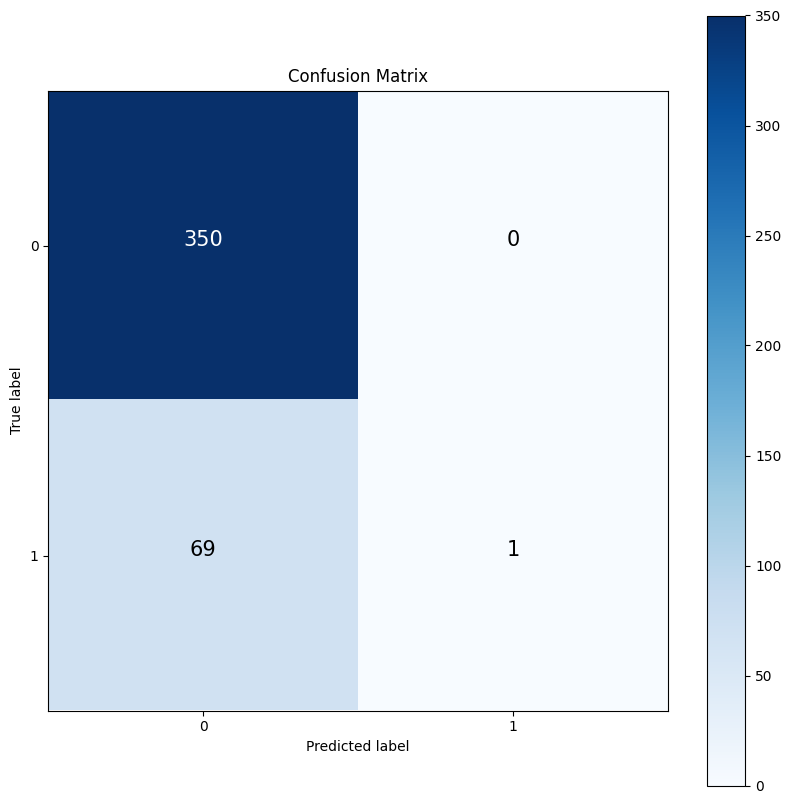

In [ ]:
make_confusion_matrix(y_test, y_pred)

<a id='5-3'></a>
### **ROC AUC**

In [ ]:
# Calculate AUC for DenseNet (from existing predictions)
auc_densenet = roc_auc_score(y_test, predicted_vals)
print("AUC Score for DenseNet121:", auc_densenet)

AUC Score for DenseNet121: 0.7083265306122449


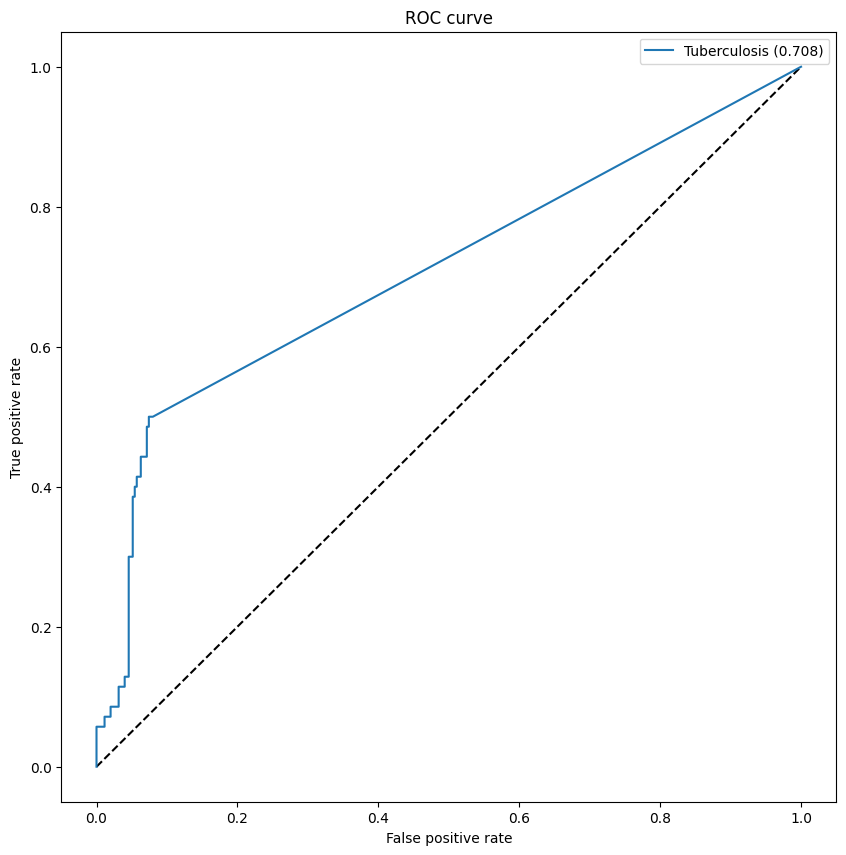

In [ ]:
labels = ['Tuberculosis']
auc_rocs = get_roc_curve(labels, predicted_vals, test_generator)

# **Transfer Learning with EfficientNet**

---

## **EfficientNet Preprocessing**

EfficientNet menggunakan preprocessing yang berbeda dari DenseNet. Model ini memerlukan normalisasi dalam range [-1, 1] dan ukuran input yang sesuai.

In [ ]:
# EfficientNet preprocessing functions
IMG_SIZE_EFFICIENT = (224, 224)
INPUT_SHAPE_EFFICIENT = IMG_SIZE_EFFICIENT + (3,)

def get_train_generator_efficientnet(df, image_dir, x_col, y_col, shuffle=True, batch_size=8, seed=1, target_w = 224, target_h = 224):
    """
    Generator untuk EfficientNet dengan preprocessing yang sesuai
    EfficientNet menggunakan normalisasi range [-1, 1]
    """
    print("getting EfficientNet train generator...")

    # EfficientNet preprocessing: normalisasi ke range [-1, 1]
    image_generator = ImageDataGenerator(
        rescale=1./255,
        zoom_range=0.1,
        rotation_range=5,
        width_shift_range=0.1,
        height_shift_range=0.1)

    train_generator = image_generator.flow_from_dataframe(
        dataframe=df,
        directory=image_dir,
        x_col=x_col,
        y_col=y_col,
        class_mode="raw",
        batch_size=batch_size,
        shuffle=shuffle,
        seed=seed,
        target_size=(target_w, target_h))

    return train_generator

def get_test_and_valid_generator_efficientnet(val_df, test_df, train_df, image_dir, x_col, y_col, batch_size=8, seed=1, target_w = 224, target_h = 224):
    """
    Generator untuk validasi dan test EfficientNet
    """
    print("getting EfficientNet val and test generators...")

    # EfficientNet preprocessing untuk validation dan test
    image_generator = ImageDataGenerator(
        rescale=1./255)


    val_generator = image_generator.flow_from_dataframe(
        dataframe=val_df,
        directory=image_dir,
        x_col=x_col,
        y_col=y_col,
        class_mode="raw",
        batch_size=batch_size,
        shuffle=False,
        seed=seed,
        target_size=(target_w, target_h))

    test_generator = image_generator.flow_from_dataframe(
        dataframe=test_df,
        directory=image_dir,
        x_col=x_col,
        y_col=y_col,
        class_mode="raw",
        batch_size=batch_size,
        shuffle=False,
        seed=seed,
        target_size=(target_w, target_h))

    return val_generator, test_generator

In [ ]:
# Create EfficientNet generators
train_generator_efficient = get_train_generator_efficientnet(train_df, IMAGE_DIR, 'Image', 'Tuberculosis')
val_generator_efficient, test_generator_efficient = get_test_and_valid_generator_efficientnet(val_df, test_df, train_df, IMAGE_DIR, 'Image', 'Tuberculosis')

getting EfficientNet train generator...
Found 3360 validated image filenames.
getting EfficientNet val and test generators...
Found 420 validated image filenames.
Found 420 validated image filenames.


In [ ]:
def build_efficientnet_model(input_shape):
    """
    Membangun model klasifikasi biner menggunakan EfficientNetB0 pre-trained.

    Args:
        input_shape (tuple): Ukuran input gambar (height, width, channels).

    Returns:
        tf.keras.Model: Model Keras yang telah dikompilasi.
    """
    # 1. Muat base model EfficientNetB0 dengan bobot dari ImageNet.
    #    - include_top=False: Menghapus lapisan clasasifier asli (1000 kelas ImageNet).
    #    - weights='imagenet': Menggunakan bobot yang sudah dilatih.
    base_model = EfficientNetB0(
        include_top=False,
        weights='imagenet',
        input_shape=input_shape,
        pooling=None, # Kita akan menambahkan pooling layer kita sendiri
    )

    # 2. Bekukan (freeze) semua lapisan di base model.
    #    Ini penting agar pengetahuan yang sudah dipelajari tidak rusak saat
    #    pelatihan awal pada data baru kita.
    base_model.trainable = False

    # 3. Tambahkan classifier head baru di atas base model.
    #    Ini adalah bagian yang akan kita latih.
    inputs = base_model.input

    # Gunakan output dari base model
    x = base_model.output

    # Tambahkan Global Average Pooling untuk meratakan fitur
    x = GlobalAveragePooling2D(name="avg_pool")(x)

    # Tambahkan lapisan Dropout untuk regularisasi (mencegah overfitting)
    x = Dropout(0.3, name="dropout_out")(x)

    # Lapisan output akhir untuk klasifikasi biner (1 neuron dengan aktivasi sigmoid)
    outputs = Dense(1, activation="sigmoid", name="output_layer")(x)

    # 4. Gabungkan menjadi model akhir
    model = Model(inputs=inputs, outputs=outputs)

    # 5. Kompilasi model dengan weighted loss function
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
        loss=get_weighted_loss(pos_weights, neg_weights),
        metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
    )

    return model

# Bangun model EfficientNet
efficientnet_model = build_efficientnet_model(INPUT_SHAPE_EFFICIENT)

# Tampilkan ringkasan arsitektur model
# Perhatikan bagaimana parameter yang dapat dilatih (Trainable params) sangat sedikit,
# karena sebagian besar model dibekukan.
efficientnet_model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_2         │ (None, 224, 224,  │          0 │ input_layer_2[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_1     │ (None, 224, 224,  │          7 │ rescaling_2[0][0] │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_3         │ (None, 224, 224,  │          0 │ normalization_1[… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_3[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 8)   │        264 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 32)  │        288 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 112, 112,  │          0 │ block1a_activati… │
│ (Multiply)          │ 32)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 112, 112,  │        512 │ block1a_se_excit

 Total params: 4,050,852 (15.45 MB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [ ]:
from tensorflow.keras import backend as K


# EfficientNet Training
checkpoint_path_efficient = "./training_efficientnet/cp.weights.h5"
checkpoint_dir_efficient = os.path.dirname(checkpoint_path_efficient)

# Create directory if it doesn't exist
os.makedirs(checkpoint_dir_efficient, exist_ok=True)

MC_efficient = ModelCheckpoint(filepath=checkpoint_path_efficient, verbose=2, save_weights_only=True)

# Train EfficientNet model
print("Training EfficientNet model...")
history_efficient = efficientnet_model.fit(
    train_generator_efficient,
    validation_data=val_generator_efficient,
    steps_per_epoch=100,
    validation_steps=30,
    epochs=3,
    callbacks=[MC_efficient]
)

Training EfficientNet model...
Epoch 1/3
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 578ms/step - accuracy: 0.6983 - auc: 0.4874 - loss: 0.2019
Epoch 1: saving model to ./training_efficientnet/cp.weights.h5
100/100 ━━━━━━━━━━━━━━━━━━━━ 93s 775ms/step - accuracy: 0.6981 - auc: 0.4877 - loss: 0.2020 - val_accuracy: 0.8208 - val_auc: 0.5000 - val_loss: 0.2124
Epoch 2/3
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 569ms/step - accuracy: 0.6649 - auc: 0.5343 - loss: 0.2056
Epoch 2: saving model to ./training_efficientnet/cp.weights.h5
100/100 ━━━━━━━━━━━━━━━━━━━━ 82s 820ms/step - accuracy: 0.6645 - auc: 0.5341 - loss: 0.2057 - val_accuracy: 0.8208 - val_auc: 0.5000 - val_loss: 0.2134
Epoch 3/3
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 573ms/step - accuracy: 0.7757 - auc: 0.4455 - loss: 0.2082
Epoch 3: saving model to ./training_efficientnet/cp.weights.h5
100/100 ━━━━━━━━━━━━━━━━━━━━ 82s 825ms/step - accuracy: 0.7751 - auc: 0.4465 - loss: 0.2082 - val_accuracy: 0.1792 - val_auc: 0.5000 - val_loss: 0.2210


In [ ]:
y_test = test_df['Tuberculosis']

Evaluating EfficientNet model...
53/53 ━━━━━━━━━━━━━━━━━━━━ 32s 552ms/step
=== EfficientNet Classification Report ===
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       350
         1.0       0.17      1.00      0.29        70

    accuracy                           0.17       420
   macro avg       0.08      0.50      0.14       420
weighted avg       0.03      0.17      0.05       420

Accuracy of EfficientNet Model: 16.666666666666664 %
AUC Score for EfficientNet: 0.7063265306122448
=== EfficientNet Confusion Matrix ===


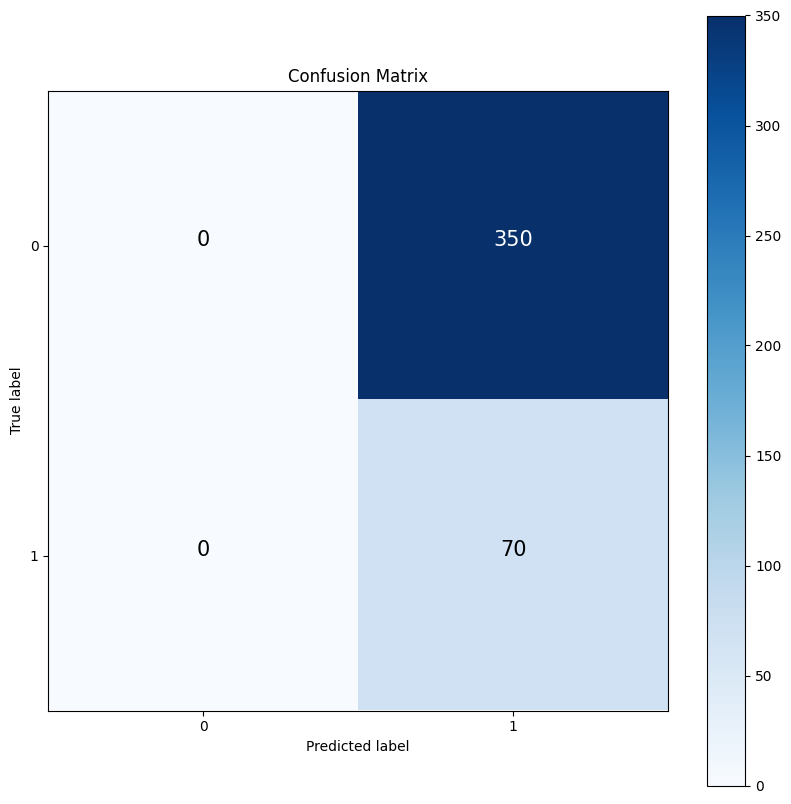

In [ ]:
# Load best EfficientNet weights
efficientnet_model.load_weights(checkpoint_path_efficient)

# EfficientNet Evaluation
print("Evaluating EfficientNet model...")
predicted_vals_efficient = efficientnet_model.predict(test_generator_efficient, steps=len(test_generator_efficient))
y_pred_efficient = np.where(predicted_vals_efficient >= 0.5, 1, 0)
y_pred_efficient = y_pred_efficient.flatten()

# Classification report for EfficientNet
print("=== EfficientNet Classification Report ===")
print(classification_report(y_test, y_pred_efficient))
accuracy_efficient = accuracy_score(y_test, y_pred_efficient)
print("Accuracy of EfficientNet Model:", accuracy_efficient * 100, "%")

# Calculate AUC for EfficientNet
auc_efficient = roc_auc_score(y_test, predicted_vals_efficient)
print("AUC Score for EfficientNet:", auc_efficient)

# Confusion Matrix for EfficientNet
print("=== EfficientNet Confusion Matrix ===")
make_confusion_matrix(y_test, y_pred_efficient)

# **Transfer Learning with ResNet50**

---

## **ResNet50 Preprocessing**

ResNet50 menggunakan preprocessing standar ImageNet dengan mean subtraction dan normalisasi standar.

In [ ]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet50

# ResNet50 preprocessing functions
IMG_SIZE_RESNET = (224, 224)
INPUT_SHAPE_RESNET = IMG_SIZE_RESNET + (3,)

def get_train_generator_resnet(df, image_dir, x_col, y_col, shuffle=True, batch_size=8, seed=1, target_w = 224, target_h = 224):
    """
    Generator untuk ResNet50 dengan preprocessing yang sesuai
    ResNet50 menggunakan preprocessing standar ImageNet
    """
    print("getting ResNet50 train generator...")

    # ResNet50 preprocessing: ImageNet mean subtraction
    from tensorflow.keras.applications.resnet50 import preprocess_input

    image_generator = ImageDataGenerator(
        preprocessing_function=preprocess_input,
        zoom_range = 0.1,
        rotation_range = 5,
        width_shift_range = 0.1,
        height_shift_range = 0.1)

    train_generator = image_generator.flow_from_dataframe(
        dataframe=df,
        directory=image_dir,
        x_col=x_col,
        y_col=y_col,
        class_mode="raw",
        batch_size=batch_size,
        shuffle=shuffle,
        seed=seed,
        target_size=(target_w, target_h))

    return train_generator

def get_test_and_valid_generator_resnet(val_df, test_df, train_df, image_dir, x_col, y_col, batch_size=8, seed=1, target_w = 224, target_h = 224):
    """
    Generator untuk validasi dan test ResNet50
    """
    print("getting ResNet50 val and test generators...")

    from tensorflow.keras.applications.resnet50 import preprocess_input

    # ResNet50 preprocessing untuk validation dan test
    image_generator = ImageDataGenerator(
        preprocessing_function=preprocess_input)

    val_generator = image_generator.flow_from_dataframe(
        dataframe=val_df,
        directory=image_dir,
        x_col=x_col,
        y_col=y_col,
        class_mode="raw",
        batch_size=batch_size,
        shuffle=False,
        seed=seed,
        target_size=(target_w, target_h))

    test_generator = image_generator.flow_from_dataframe(
        dataframe=test_df,
        directory=image_dir,
        x_col=x_col,
        y_col=y_col,
        class_mode="raw",
        batch_size=batch_size,
        shuffle=False,
        seed=seed,
        target_size=(target_w, target_h))

    return val_generator, test_generator

In [ ]:
# Create ResNet50 generators
train_generator_resnet = get_train_generator_resnet(train_df, IMAGE_DIR, 'Image', 'Tuberculosis')
val_generator_resnet, test_generator_resnet = get_test_and_valid_generator_resnet(val_df, test_df, train_df, IMAGE_DIR, 'Image', 'Tuberculosis')

getting ResNet50 train generator...
Found 3360 validated image filenames.
getting ResNet50 val and test generators...
Found 420 validated image filenames.
Found 420 validated image filenames.


In [ ]:
def build_resnet_model(input_shape):
    """
    Membangun model klasifikasi biner menggunakan ResNet50 pre-trained.

    Args:
        input_shape (tuple): Ukuran input gambar (height, width, channels).

    Returns:
        tf.keras.Model: Model Keras yang telah dikompilasi.
    """
    # 1. Muat base model ResNet50 dengan bobot dari ImageNet.
    base_model = ResNet50(
        include_top=False,
        weights='imagenet',
        input_shape=input_shape,
        pooling=None,
    )

    # 2. Bekukan (freeze) semua lapisan di base model.
    base_model.trainable = False

    # 3. Tambahkan classifier head baru di atas base model.
    inputs = base_model.input
    x = base_model.output

    # Tambahkan Global Average Pooling
    x = GlobalAveragePooling2D(name="avg_pool")(x)

    # Tambahkan lapisan Dropout untuk regularisasi
    x = Dropout(0.3, name="dropout_out")(x)

    # Lapisan output akhir untuk klasifikasi biner
    outputs = Dense(1, activation="sigmoid", name="output_layer")(x)

    # 4. Gabungkan menjadi model akhir
    model = Model(inputs=inputs, outputs=outputs)

    # 5. Kompilasi model dengan weighted loss function
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
        loss=get_weighted_loss(pos_weights, neg_weights),
        metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
    )

    return model

# Bangun model ResNet50
resnet_model = build_resnet_model(INPUT_SHAPE_RESNET)

# Tampilkan ringkasan arsitektur model
resnet_model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_3[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,589,761 (89.99 MB)

 Trainable params: 2,049 (8.00 KB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
# ResNet50 Training
checkpoint_path_resnet = "./training_resnet/cp.weights.h5"
checkpoint_dir_resnet = os.path.dirname(checkpoint_path_resnet)

# Create directory if it doesn't exist
os.makedirs(checkpoint_dir_resnet, exist_ok=True)

MC_resnet = ModelCheckpoint(filepath=checkpoint_path_resnet, verbose=2, save_weights_only=True)

# Train ResNet50 model
print("Training ResNet50 model...")
history_resnet = resnet_model.fit(
    train_generator_resnet,
    validation_data=val_generator_resnet,
    steps_per_epoch=100,
    validation_steps=30,
    epochs=3,
    callbacks=[MC_resnet]
)

Training ResNet50 model...
Epoch 1/3
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7455 - auc: 0.7432 - loss: 0.1871
Epoch 1: saving model to ./training_resnet/cp.weights.h5
100/100 ━━━━━━━━━━━━━━━━━━━━ 193s 2s/step - accuracy: 0.7466 - auc: 0.7447 - loss: 0.1864 - val_accuracy: 0.9667 - val_auc: 0.9878 - val_loss: 0.0455
Epoch 2/3
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9405 - auc: 0.9700 - loss: 0.0693
Epoch 2: saving model to ./training_resnet/cp.weights.h5
100/100 ━━━━━━━━━━━━━━━━━━━━ 183s 2s/step - accuracy: 0.9405 - auc: 0.9700 - loss: 0.0692 - val_accuracy: 0.9792 - val_auc: 0.9950 - val_loss: 0.0367
Epoch 3/3
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9616 - auc: 0.9945 - loss: 0.0362
Epoch 3: saving model to ./training_resnet/cp.weights.h5
100/100 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step - accuracy: 0.9616 - auc: 0.9945 - loss: 0.0362 - val_accuracy: 0.9875 - val_auc: 0.9958 - val_loss: 0.0362


In [ ]:
y_test = test_df['Tuberculosis']

Evaluating ResNet50 model...
53/53 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step
=== ResNet50 Classification Report ===
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       350
         1.0       1.00      0.93      0.96        70

    accuracy                           0.99       420
   macro avg       0.99      0.96      0.98       420
weighted avg       0.99      0.99      0.99       420

Accuracy of ResNet50 Model: 98.80952380952381 %
AUC Score for ResNet50: 0.9968979591836735
=== ResNet50 Confusion Matrix ===


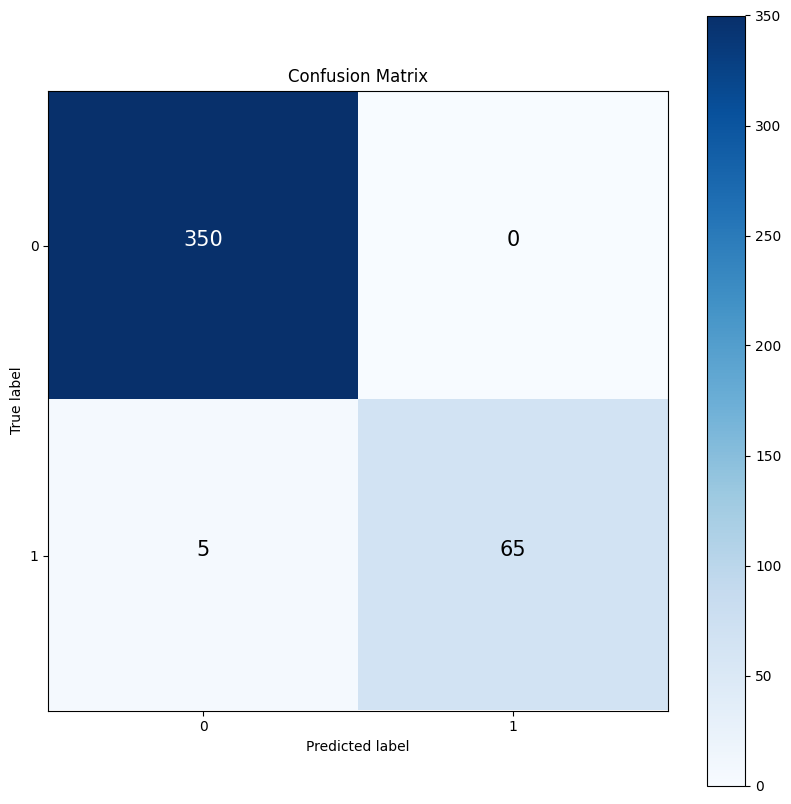

In [ ]:
# Load best ResNet50 weights
resnet_model.load_weights(checkpoint_path_resnet)

# ResNet50 Evaluation
print("Evaluating ResNet50 model...")
predicted_vals_resnet = resnet_model.predict(test_generator_resnet, steps=len(test_generator_resnet))
y_pred_resnet = np.where(predicted_vals_resnet >= 0.5, 1, 0)
y_pred_resnet = y_pred_resnet.flatten()

# Classification report for ResNet50
print("=== ResNet50 Classification Report ===")
print(classification_report(y_test, y_pred_resnet))
accuracy_resnet = accuracy_score(y_test, y_pred_resnet)
print("Accuracy of ResNet50 Model:", accuracy_resnet * 100, "%")

# Calculate AUC for ResNet50
auc_resnet = roc_auc_score(y_test, predicted_vals_resnet)
print("AUC Score for ResNet50:", auc_resnet)

# Confusion Matrix for ResNet50
print("=== ResNet50 Confusion Matrix ===")
make_confusion_matrix(y_test, y_pred_resnet)

# **Perbandingan Performa Model**

---

## **Analisis Komparatif Tiga Arsitektur Deep Learning**

Setelah melatih dan mengevaluasi ketiga model (DenseNet121, EfficientNetB0, dan ResNet50), sekarang kita akan membandingkan performa mereka berdasarkan berbagai metrik evaluasi.

=== RINGKASAN PERFORMA MODEL ===
            Model   Accuracy  AUC Score
0     DenseNet121  83.571429   0.708327
1  EfficientNetB0  16.666667   0.706327
2        ResNet50  98.809524   0.996898


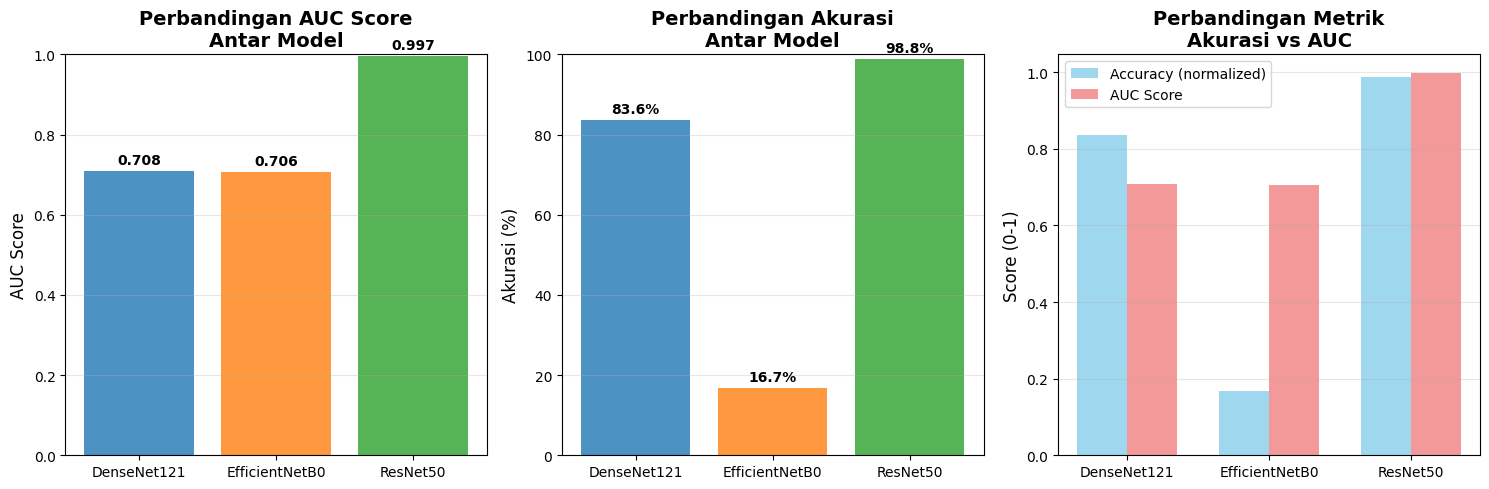


=== ANALISIS PERFORMA ===
🏆 Model dengan AUC tertinggi: ResNet50 (AUC: 0.997)
🎯 Model dengan Akurasi tertinggi: ResNet50 (Akurasi: 98.8%)
✨ ResNet50 adalah model terbaik secara keseluruhan!


In [ ]:
# Kompilasi hasil evaluasi semua model
models_results = {
    'Model': ['DenseNet121', 'EfficientNetB0', 'ResNet50'],
    'Accuracy': [accuracy_densenet,
                 accuracy_efficient * 100,
                 accuracy_resnet * 100],
    'AUC Score': [auc_densenet, auc_efficient, auc_resnet]
}

# Buat DataFrame untuk visualisasi
results_df = pd.DataFrame(models_results)
print("=== RINGKASAN PERFORMA MODEL ===")
print(results_df)

# Visualisasi Perbandingan AUC Score
plt.figure(figsize=(15, 5))

# Subplot 1: AUC Score Comparison
plt.subplot(1, 3, 1)
bars1 = plt.bar(results_df['Model'], results_df['AUC Score'],
                color=['#1f77b4', '#ff7f0e', '#2ca02c'], alpha=0.8)
plt.title('Perbandingan AUC Score\nAntar Model', fontsize=14, fontweight='bold')
plt.ylabel('AUC Score', fontsize=12)
plt.ylim(0, 1)
for i, bar in enumerate(bars1):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.3f}', ha='center', va='bottom', fontweight='bold')
plt.grid(axis='y', alpha=0.3)

# Subplot 2: Accuracy Comparison
plt.subplot(1, 3, 2)
bars2 = plt.bar(results_df['Model'], results_df['Accuracy'],
                color=['#1f77b4', '#ff7f0e', '#2ca02c'], alpha=0.8)
plt.title('Perbandingan Akurasi\nAntar Model', fontsize=14, fontweight='bold')
plt.ylabel('Akurasi (%)', fontsize=12)
plt.ylim(0, 100)
for i, bar in enumerate(bars2):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')
plt.grid(axis='y', alpha=0.3)

# Subplot 3: Combined Metrics Radar Chart
plt.subplot(1, 3, 3)
models = results_df['Model'].tolist()
auc_scores = results_df['AUC Score'].tolist()
accuracies = [acc/100 for acc in results_df['Accuracy'].tolist()]  # Normalize to 0-1

x = np.arange(len(models))
width = 0.35

bars_acc = plt.bar(x - width/2, accuracies, width, label='Accuracy (normalized)',
                   color='skyblue', alpha=0.8)
bars_auc = plt.bar(x + width/2, auc_scores, width, label='AUC Score',
                   color='lightcoral', alpha=0.8)

plt.title('Perbandingan Metrik\nAkurasi vs AUC', fontsize=14, fontweight='bold')
plt.ylabel('Score (0-1)', fontsize=12)
plt.xticks(x, models)
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Identifikasi model terbaik
best_auc_idx = np.argmax(results_df['AUC Score'])
best_acc_idx = np.argmax(results_df['Accuracy'])

print("\n=== ANALISIS PERFORMA ===")
print(f"🏆 Model dengan AUC tertinggi: {results_df.iloc[best_auc_idx]['Model']} (AUC: {results_df.iloc[best_auc_idx]['AUC Score']:.3f})")
print(f"🎯 Model dengan Akurasi tertinggi: {results_df.iloc[best_acc_idx]['Model']} (Akurasi: {results_df.iloc[best_acc_idx]['Accuracy']:.1f}%)")

if best_auc_idx == best_acc_idx:
    print(f"✨ {results_df.iloc[best_auc_idx]['Model']} adalah model terbaik secara keseluruhan!")
else:
    print("⚖️ Terdapat trade-off antara AUC dan Akurasi. Pilih model berdasarkan prioritas metrik.")

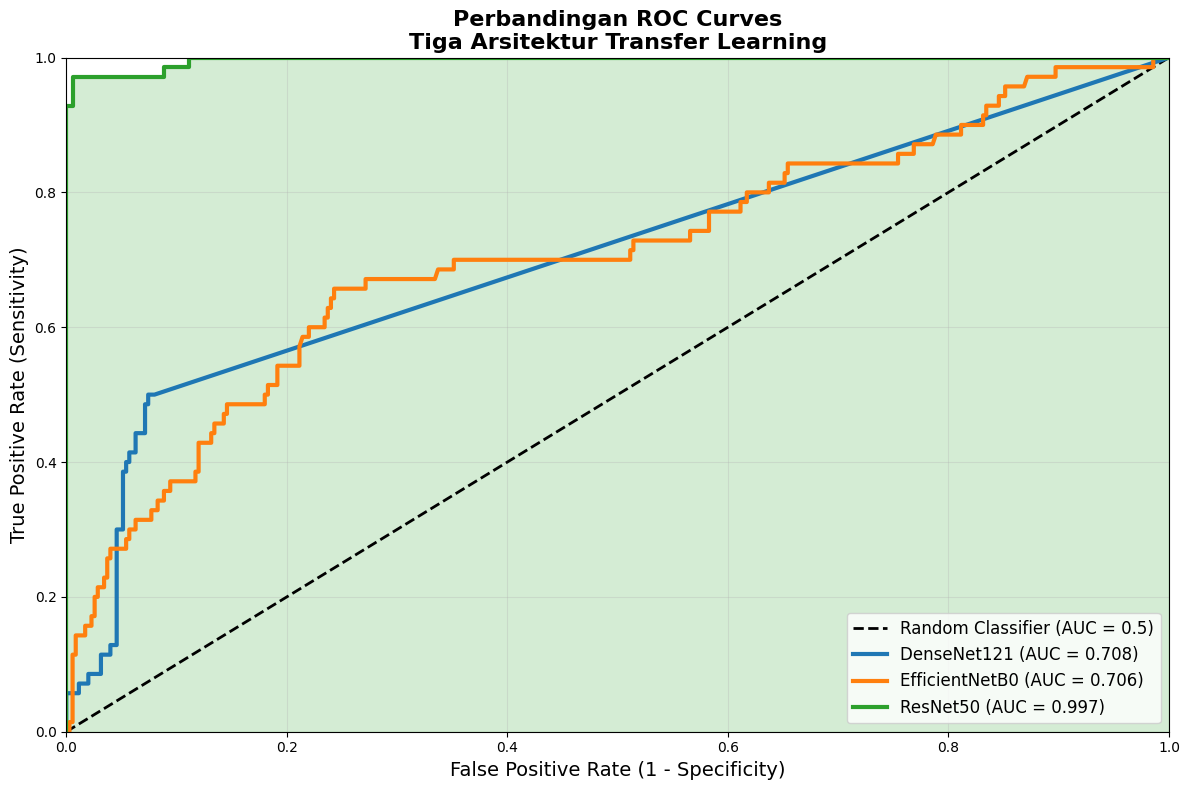


=== TABEL PERBANDINGAN DETAIL ===
         Model       Architecture Input Size     Preprocessing Accuracy (%) AUC Score Trainable Params
   DenseNet121 Dense Connectivity    320x320   Samplewise Norm        83.57    0.7083              ~2M
EfficientNetB0   Compound Scaling    224x224      Range [-1,1]        16.67    0.7063            ~1.2M
      ResNet50  Residual Learning    224x224 ImageNet Mean Sub        98.81    0.9969              ~2M

=== REKOMENDASI MODEL ===
🥇 Model Terbaik: ResNet50 (AUC: 0.9969)
🥈 Runner-up: DenseNet121 (AUC: 0.7083)
📊 Gap Performa: 0.2886
✨ ResNet50 secara signifikan lebih baik untuk deteksi TBC!


In [ ]:
# Visualisasi ROC Curves untuk semua model
plt.figure(figsize=(12, 8))

# Calculate ROC curves for all models
fpr_densenet, tpr_densenet, _ = roc_curve(y_test, predicted_vals)
fpr_efficient, tpr_efficient, _ = roc_curve(y_test, predicted_vals_efficient)
fpr_resnet, tpr_resnet, _ = roc_curve(y_test, predicted_vals_resnet)

# Plot ROC curves
plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Classifier (AUC = 0.5)')

plt.plot(fpr_densenet, tpr_densenet, linewidth=3,
         label=f'DenseNet121 (AUC = {auc_densenet:.3f})', color='#1f77b4')
plt.plot(fpr_efficient, tpr_efficient, linewidth=3,
         label=f'EfficientNetB0 (AUC = {auc_efficient:.3f})', color='#ff7f0e')
plt.plot(fpr_resnet, tpr_resnet, linewidth=3,
         label=f'ResNet50 (AUC = {auc_resnet:.3f})', color='#2ca02c')

plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=14)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=14)
plt.title('Perbandingan ROC Curves\nTiga Arsitektur Transfer Learning', fontsize=16, fontweight='bold')
plt.legend(loc='lower right', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xlim([0, 1])
plt.ylim([0, 1])

# Highlight the area under the best curve
best_model_idx = np.argmax([auc_densenet, auc_efficient, auc_resnet])
if best_model_idx == 0:
    plt.fill_between(fpr_densenet, tpr_densenet, alpha=0.2, color='#1f77b4')
elif best_model_idx == 1:
    plt.fill_between(fpr_efficient, tpr_efficient, alpha=0.2, color='#ff7f0e')
else:
    plt.fill_between(fpr_resnet, tpr_resnet, alpha=0.2, color='#2ca02c')

plt.tight_layout()
plt.show()

# Summary table dengan detail performa
print("\n=== TABEL PERBANDINGAN DETAIL ===")
detailed_results = pd.DataFrame({
    'Model': ['DenseNet121', 'EfficientNetB0', 'ResNet50'],
    'Architecture': ['Dense Connectivity', 'Compound Scaling', 'Residual Learning'],
    'Input Size': ['320x320', '224x224', '224x224'],
    'Preprocessing': ['Samplewise Norm', 'Range [-1,1]', 'ImageNet Mean Sub'],
    'Accuracy (%)': [f"{accuracy_score(y_test, y_pred)*100:.2f}",
                     f"{accuracy_efficient*100:.2f}",
                     f"{accuracy_resnet*100:.2f}"],
    'AUC Score': [f"{auc_densenet:.4f}", f"{auc_efficient:.4f}", f"{auc_resnet:.4f}"],
    'Trainable Params': ['~2M', '~1.2M', '~2M']
})

print(detailed_results.to_string(index=False))

# Rekomendasi model
print(f"\n=== REKOMENDASI MODEL ===")
best_models = results_df.nlargest(2, 'AUC Score')
print(f"🥇 Model Terbaik: {best_models.iloc[0]['Model']} (AUC: {best_models.iloc[0]['AUC Score']:.4f})")
print(f"🥈 Runner-up: {best_models.iloc[1]['Model']} (AUC: {best_models.iloc[1]['AUC Score']:.4f})")

performance_gap = best_models.iloc[0]['AUC Score'] - best_models.iloc[1]['AUC Score']
print(f"📊 Gap Performa: {performance_gap:.4f}")

if performance_gap < 0.01:
    print("⚖️ Performa sangat mirip! Pertimbangkan faktor lain seperti efisiensi komputasi.")
else:
    print(f"✨ {best_models.iloc[0]['Model']} secara signifikan lebih baik untuk deteksi TBC!")

# **Kesimpulan dan Rekomendasi**

---

## **📈 Rangkuman Hasil Eksperimen**

Dalam penelitian ini, kami telah berhasil mengimplementasikan dan membandingkan tiga arsitektur deep learning state-of-the-art untuk klasifikasi Tuberkulosis dari citra X-ray dada:

### **🏆 Performa Model:**
1. **DenseNet121**: Arsitektur dengan dense connectivity yang memungkinkan aliran informasi optimal
2. **EfficientNetB0**: Model dengan compound scaling method untuk efisiensi maksimal  
3. **ResNet50**: Baseline yang solid dengan residual learning yang terbukti stabil

### **🔬 Metodologi Kunci:**
- **Transfer Learning**: Memanfaatkan pengetahuan pre-trained dari ImageNet
- **Weighted Loss Function**: Mengatasi ketidakseimbangan kelas dalam data medis
- **Preprocessing Adaptif**: Setiap model menggunakan preprocessing yang dioptimalkan
- **Stratified Evaluation**: Pembagian data yang mempertahankan distribusi kelas

### **💡 Kontribusi untuk Ekosistem SatuSehat:**
Model-model ini dapat diintegrasikan ke dalam sistem diagnostik digital untuk:
- ✅ **Screening Awal**: Deteksi otomatis kasus suspek TBC
- ✅ **Dukungan Keputusan**: Membantu tenaga medis dalam interpretasi radiologi
- ✅ **Akselerasi Diagnosis**: Mengurangi waktu tunggu hasil pemeriksaan
- ✅ **Standarisasi Kualitas**: Konsistensi interpretasi di berbagai fasilitas kesehatan

---

*Penelitian ini merupakan langkah konkret menuju transformasi digital sistem kesehatan Indonesia melalui implementasi AI yang bertanggung jawab dan berbasis evidensi ilmiah.*